In [ ]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# !pip install wordcloud

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
PATH = '/content/drive/MyDrive/DSI Month 4/Week 13/NLP text sets/cnn_lite'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

In [ ]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

In [ ]:
def text_stats(doc):
  sents = sent_tokenize(doc)
  tokens = word_tokenize(doc)
  words = [token.lower() for token in tokens 
           if token.lower() not in stopwords.words('english') 
           if token not in string.punctuation]

  num_sents = len(sents) # number of sentences
  num_tokens = len(tokens) # number of tokens
  num_words = len(words) # number of words
  vocab = len(set(words)) # unique number of words
  characters = sum([len(word) for word in words]) # total number of characters

  spacy_doc = nlp(doc)
  # filter out numeric entity types
  remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
            'ORDINAL', 'CARDINAL']

  # create a list of entities excluding numeric entity types
  entities = [entity.text for entity in spacy_doc.ents 
              if entity.label_ not in remove]

  num_entities = len(set(entities))
  words_sent = num_words / num_sents
  char_word = characters / num_words
  lex_div = vocab / num_words

  stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
           words_sent, char_word, lex_div]
           
  return stats

In [ ]:
text_stats(docs[0])

[75,
 1654,
 830,
 538,
 45,
 11.066666666666666,
 5.913253012048193,
 0.6481927710843374]

In [ ]:
stats = []

for i, doc in enumerate(docs[:-2]):
  doc_stats = text_stats(doc)
  doc_stats = [f'article_{i}'] + doc_stats
  stats.append(doc_stats)

In [ ]:
doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,article_0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,article_1,20,469,262,179,25,13.100000,6.248092,0.683206
2,article_2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,article_3,28,803,454,255,33,16.214286,6.011013,0.561674
4,article_4,34,620,316,204,16,9.294118,5.924051,0.645570


In [ ]:
doc_df['file_id'] = corpus.fileids()

In [ ]:
doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,article_0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,article_1,20,469,262,179,25,13.100000,6.248092,0.683206
2,article_2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,article_3,28,803,454,255,33,16.214286,6.011013,0.561674
4,article_4,34,620,316,204,16,9.294118,5.924051,0.645570


In [ ]:
doc_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,53.109091,1061.381818,561.109091,324.363636,37.290909,11.318784,6.018993,0.661854
std,70.429811,1224.878611,634.883736,258.331567,38.218995,2.151427,0.409639,0.093746
min,8.000000,96.000000,59.000000,48.000000,7.000000,7.375000,5.131579,0.351988
25%,18.500000,391.000000,201.000000,145.500000,15.000000,9.747432,5.788462,0.616209
50%,27.000000,609.000000,324.000000,219.000000,26.000000,10.687500,6.052632,0.663043
75%,64.500000,1319.000000,744.000000,433.000000,47.000000,12.923548,6.315785,0.727105
max,423.000000,7635.000000,3949.000000,1390.000000,238.000000,16.708333,6.827086,0.819549


In [ ]:
doc_df[doc_df['Entities'] == 7]

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
9,article_9,14,249,133,109,7,9.5,5.887218,0.819549


In [ ]:
# select a random document from our list of docs
doc = docs[21]

cleaned = [token.lower() for token in word_tokenize(doc)
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

fdist = FreqDist(cleaned)

In [ ]:
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
fdist_df.head()

,Term,Freq
0,cnn,5
1,puppy,3
2,missouri,2
3,tail,7
4,growing,1


In [ ]:
ordered = fdist_df.sort_values('Freq', ascending=False)

In [ ]:
filtered = ordered[ordered['Freq'] > 1]
filtered.head()

,Term,Freq
10,narwhal,9
3,tail,7
0,cnn,5
23,mission,4
5,forehead,4


Text(0.5, 1.0, 'Term Frequency Distribution \n')

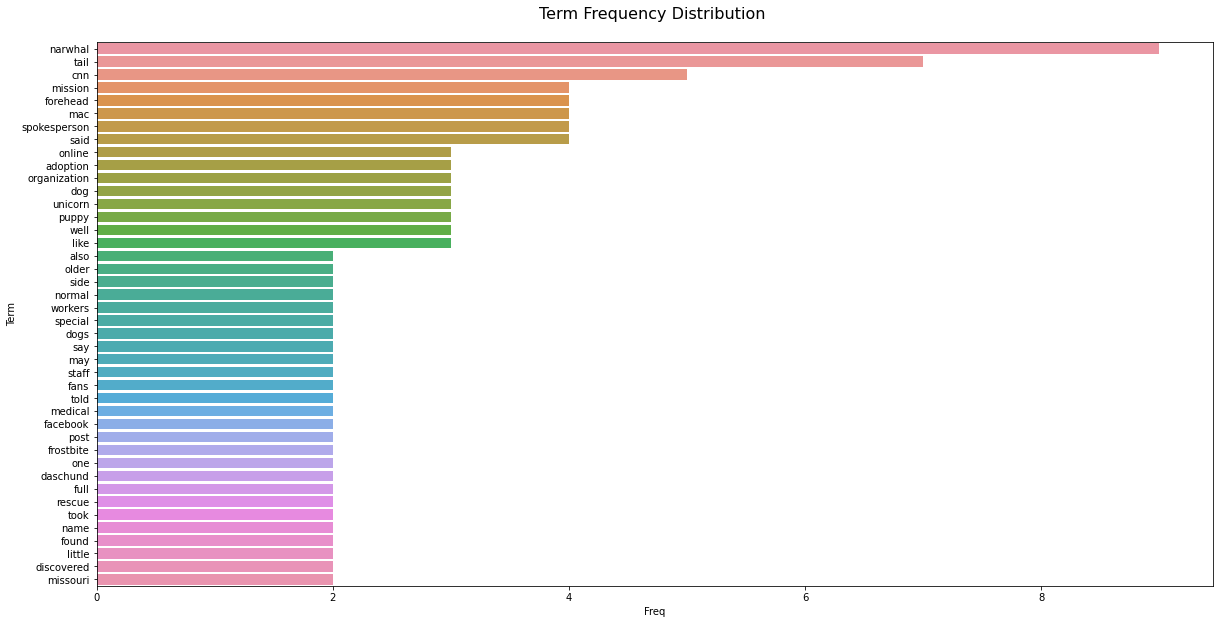

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=filtered, x='Freq', y='Term')
plt.title('Term Frequency Distribution \n', fontsize=16)

In [ ]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

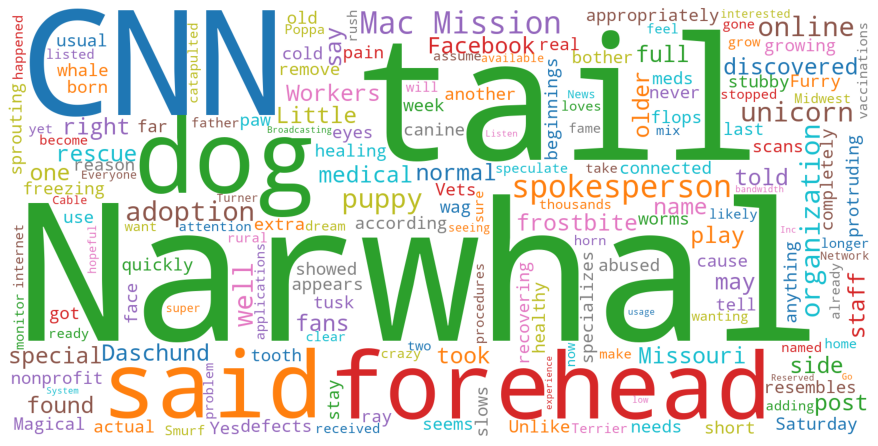

In [ ]:
wordcloud(doc)

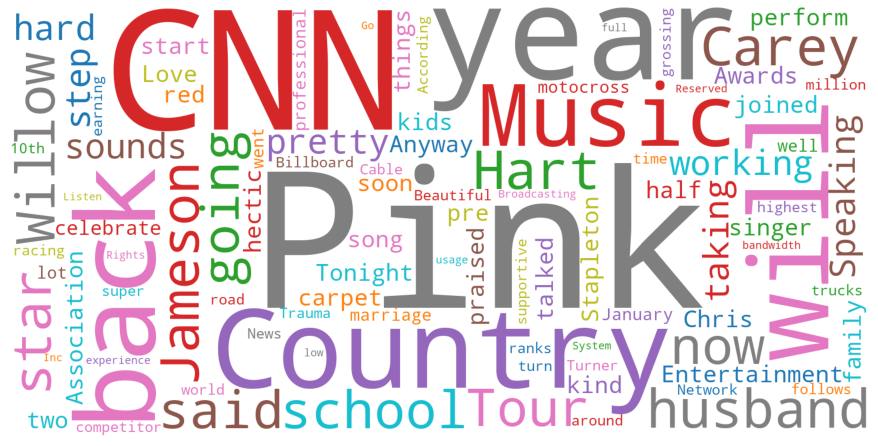

In [ ]:
wordcloud(docs[50])

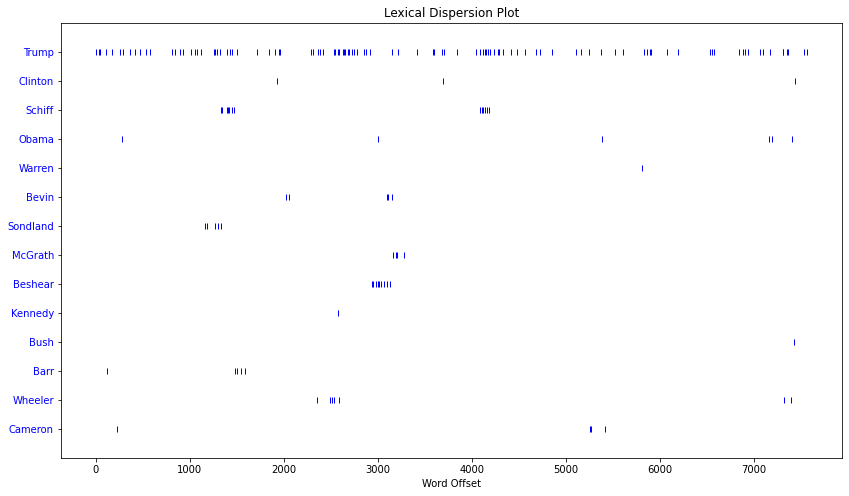

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 14,8

doc = docs[7]
tokenized = word_tokenize(doc)

terms = ['Trump', 'Clinton', 'Schiff', 'Obama', 'Warren', 'Bevin', 'Sondland',
         'McGrath', 'Beshear', 'Kennedy', 'Bush', 'Barr', 'Wheeler', 'Cameron']

Text(tokenized).dispersion_plot(terms)

In [ ]:
tokenized[7]

'Trump'

In [ ]:
from yellowbrick.text.postag import PosTagVisualizer

doc = docs[43]

tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color) for color, token in visualizer.tagged)))

( CNN ) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run , a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins . On the eve of the first public impeachment hearings , former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state 's Democratic primary ballot , should he decide to run . Former Massachusetts Gov . Deval Patrick weighed a late entry to the race while facing down Friday 's filing deadline in the key state of New Hampshire . And Hillary Clinton coyly suggested , once again , that she could leap from the sidelines . Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency , and undoubtedly unnerving some current 2020 Democrats . Clinton told BBC Radio that she was not running for president in 2020 , but she left the door ajar . `` Never say never , and I will certainly tell you I 'm unde

In [ ]:
tagged

[('(', '('),
 ('CNN', 'NNP'),
 (')', ')'),
 ('-', ':'),
 ('Three', 'CD'),
 ('Democratic', 'JJ'),
 ('heavyweights', 'NNS'),
 ('this', 'DT'),
 ('week', 'NN'),
 ('have', 'VBP'),
 ('dangled', 'VBN'),
 ('the', 'DT'),
 ('possibility', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('2020', 'CD'),
 ('White', 'NNP'),
 ('House', 'NNP'),
 ('run', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('reflection', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('extraordinarily', 'RB'),
 ('unsettled', 'JJ'),
 ('nature', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Democratic', 'JJ'),
 ('field', 'NN'),
 ('only', 'RB'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('months', 'NNS'),
 ('before', 'IN'),
 ('voting', 'NN'),
 ('begins', 'NNS'),
 ('.', '.'),
 ('On', 'IN'),
 ('the', 'DT'),
 ('eve', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('first', 'JJ'),
 ('public', 'JJ'),
 ('impeachment', 'NN'),
 ('hearings', 'NNS'),
 (',', ','),
 ('former', 'JJ'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('Mayor', 'NNP'),
 ('Michael', 'NNP'),
 ('Bloomberg', 'NNP'),
 ('made', 'VB